In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [19]:
"""

Author: Kavindu Chamith
Date: 01/09/2021
Description: Usage of Laplacian, Robert Cross gradient operator
             and Sobel gradient for image sharpening

"""

'\n\nAuthor: Kavindu Chamith\nDate: 01/09/2021\nDescription: Usage of Laplacian, Robert Cross gradient operator\n             and Sobel gradient for image sharpening\n\n'

In [20]:
""" helper function for displaying a grayscale image """
def showImage(img, width, height):
    # changing the size of canvas
    plt.rcParams['figure.figsize'] = [width, height] 
    plt.imshow(img, cmap='gray')
    plt.show()

In [21]:
""" function for Laplacian operator """
def laplacian(img):
    # kernel for laplacian
    kernel = np.array( [[0, 1, 0],
                        [1, -4, 1], 
                        [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernel_size = kernel.shape[0]
    padImg = np.pad(img, pad_width=kernel_size//2, mode='edge') # replicate the border for padding
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            # extract the necessary window 
            extracted = padImg[row:row+kernel_size, col: col+kernel_size]
            val = int(np.sum(extracted * kernel))
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [22]:
""" function for Robert Cross operator """
def robertCross(img):
    # Robert Cross convolution kernels
    kx = np.array([ [0, 0, 0], 
                    [0, -1, 0], 
                    [0, 0, 1]])
                    
    ky = np.array([ [0, 0, 0], 
                    [0, 0, -1], 
                    [0, 1, 0]])

    newimg = np.zeros(img.shape, dtype='uint8') 
    kernel_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernel_size//2, mode='edge') # replicate the border for padding

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            # extract the relevant window
            extracted = padImg[row:row+kernel_size, col: col+kernel_size]
            temp1 = int(np.sum(extracted * kx)) # result of 1st kernel
            temp2 = int(np.sum(extracted * ky)) # result of 2nd kernel
            # val = math.sqrt((temp1**2) + (temp2**2)) # theoretical value
            val = abs(temp1) + abs(temp2)
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg
    

In [23]:
""" function for Sobel operator """
def sobelOperator(img):
    # kernal for horizontal direction
    kx = np.array([ [-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
    
    # kernal for vertical direction
    ky = np.array([ [-1,-2,-1], 
                    [0, 0, 0], 
                    [1, 2, 1]])
                    
    newimg = np.zeros(img.shape, dtype='uint8') 
    kernel_size = kx.shape[0]
    padImg = np.pad(img, pad_width=kernel_size//2, mode='edge') # border replicated

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            extracted = padImg[row:row+kernel_size, col: col+kernel_size]
            temp1 = int(np.sum(extracted * kx))
            temp2 = int(np.sum(extracted * ky))
            # val = math.sqrt((temp1**2) + (temp2**2)) # theoretical value
            val = abs(temp1) + abs(temp2) 
            # rounding off values to 8bit integers
            newimg[row][col] = 255 if val > 255 else 0 if val < 0 else math.ceil(val)
    return newimg

In [24]:
""" helper function for power transform operation """
def powerTransform(img, gammaValue):
    temp = 255 * ((img/255)**gammaValue)
    return np.array(temp, dtype=np.uint8)

In [25]:
if __name__ == '__main__':
    # reading the image as a grayscale image
    girl = cv2.imread('girl.jpg', 0)

In [26]:
    # """ The Laplacian """

    lap1 = laplacian(girl) # result of custom function
    lap2 = cv2.Laplacian(girl, -1, borderType=cv2.BORDER_REPLICATE) # built-in function
    showImage(cv2.hconcat([lap1, lap2]), 10, 5) 

In [27]:
    # substracting since center coefficient of mask is negative
    result = cv2.subtract(girl,lap1) 
    # original image vs sharpened image
    showImage(cv2.hconcat([lap1, girl, result]), 18, 6)

In [28]:
    """ Robert Cross gradient operator"""

    rob1 = robertCross(girl) # applying Robert Cross operator
    showImage(cv2.hconcat([girl, rob1]), 12, 6)

In [29]:
    """ Sobel operator """
    sob1 = sobelOperator(girl)
    showImage(cv2.hconcat([girl, sob1]), 12, 6)

In [30]:
    """ task 2 """
    
    # 2.1 reading the image
    girl2 = cv2.imread('girl2.jpg', 0)

In [31]:
    # 2.2 apply Laplacian operator
    lap3 = laplacian(girl2)
    # 2.3 subtract with the original image
    result = cv2.subtract(girl2, lap3)
    showImage(cv2.hconcat([lap3, girl2, result]), 18, 6)

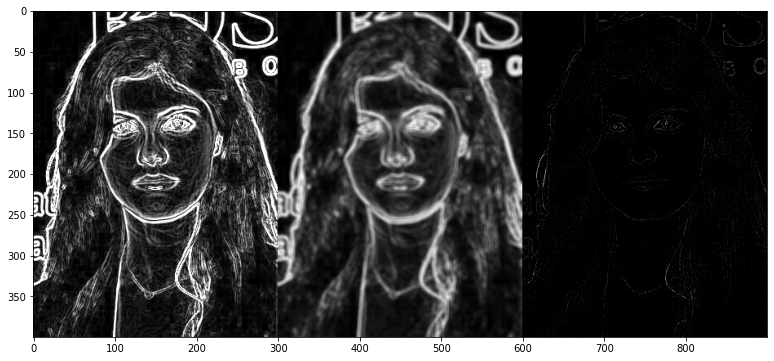

In [32]:
    # 2.4 applying sobel filter
    sobfilter = sobelOperator(girl2)
    
    # 2.5 smooth sobel image using a 5x5 averaging filter
    smoothSob = cv2.blur(sobfilter, (5,5)) 

    # 2.6 masking laplacian with smoothed sobel filter
    masked = cv2.bitwise_and(smoothSob, lap3)

    showImage(cv2.hconcat([sobfilter, smoothSob, masked]), 18, 6)

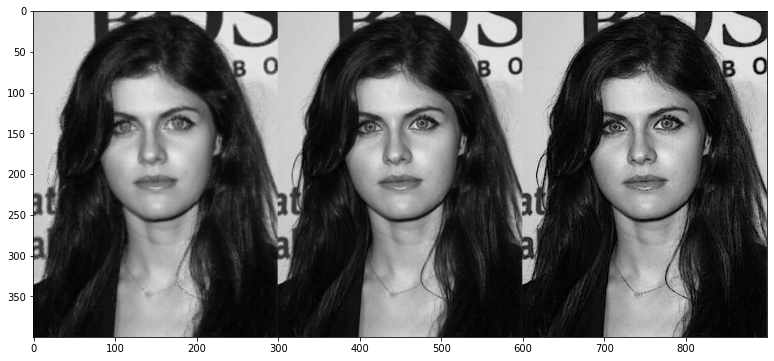

In [33]:
    # 2.7 add masked with original
    added = cv2.add(girl2, masked)
    # subtract masked from original
    subd = cv2.subtract(girl2, masked)
    # results
    showImage(cv2.hconcat([added,girl2, subd]), 18, 6)

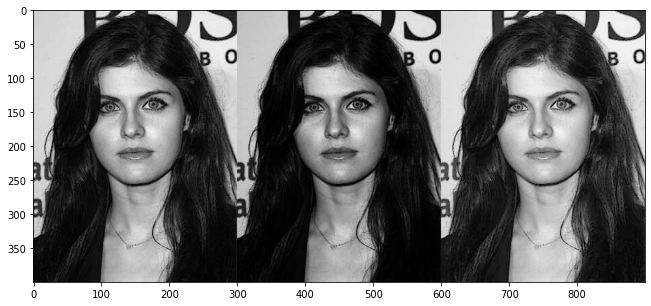

In [34]:
    # 2.8 applying power law transformation
    powered1 = powerTransform(subd, 1.3) # gamma value = 1.3
    powered2 = powerTransform(subd, 0.8) # gamma value = 0.8
    showImage(cv2.hconcat([subd, powered1, powered2]), 18, 6)
